# Second set of engines

## Operation conditions:

- 260 train units
- 259 test units
- Six flight conditions
- 1 Fault mode

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import *

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df_train_2 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/train_FD002.txt', sep=" ", header=None)
df_train_2.head()

0   1        2       3      4       5       6        7        8     9     10      11       12       13    14     15      16       17       18       19    20   21    22      23     24      25  26  27
0   1   1  34.9983  0.8400  100.0  449.44  555.32  1358.61  1137.23  5.48  8.00  194.64  2222.65  8341.91  1.02  42.02  183.06  2387.72  8048.56   9.3461  0.02  334  2223  100.00  14.73  8.8071 NaN NaN
1   1   2  41.9982  0.8408  100.0  445.00  549.90  1353.22  1125.78  3.91  5.71  138.51  2211.57  8303.96  1.02  42.20  130.42  2387.66  8072.30   9.3774  0.02  330  2212  100.00  10.41  6.2665 NaN NaN
2   1   3  24.9988  0.6218   60.0  462.54  537.31  1256.76  1047.45  7.05  9.02  175.71  1915.11  8001.42  0.94  36.69  164.22  2028.03  7864.87  10.8941  0.02  309  1915   84.93  14.08  8.6723 NaN NaN
3   1   4  42.0077  0.8416  100.0  445.00  549.51  1354.03  1126.38  3.91  5.71  138.46  2211.58  8303.96  1.02  41.96  130.72  2387.61  8068.66   9.3528  0.02  329  2212  100.00  10.59  6.4701 NaN NaN
4   1   5  25.0005  0.6203   60.0  462.54  537.07  1257.71  1047.93  7.05  9.03  175.05  1915.10  7993.23  0.94  36.89  164.31  2028.00  7861.23  10.8963  0.02  309  1915   84.93  14.13  8.5286 NaN NaN

As columns come with no name, and based on documentation provided, proceed to rename the features

In [3]:
list_units_1 = 3
operational_list = []
for n in range(1,list_units_1+1):
    operational = "operarional_setting_" + str(n)
    operational_list.append(operational)

list_units_2 = 23
sensor_measurement_list = []
for n in range(1,list_units_2+1):
    sensor = "sensor_measurement_" + str(n)
    sensor_measurement_list.append(sensor)

In [4]:
df_train_2.columns = ["ID","Cycle"] + operational_list + sensor_measurement_list
df_train_2.head()

ID  Cycle  operarional_setting_1  operarional_setting_2  operarional_setting_3  sensor_measurement_1  sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  sensor_measurement_6  sensor_measurement_7  sensor_measurement_8  sensor_measurement_9  sensor_measurement_10  sensor_measurement_11  sensor_measurement_12  sensor_measurement_13  sensor_measurement_14  sensor_measurement_15  sensor_measurement_16  sensor_measurement_17  sensor_measurement_18  sensor_measurement_19  sensor_measurement_20  sensor_measurement_21  sensor_measurement_22  sensor_measurement_23
0   1      1                34.9983                 0.8400                  100.0                449.44                555.32               1358.61               1137.23                  5.48                  8.00                194.64               2222.65               8341.91                   1.02                  42.02                 183.06                2387.72                8048.56                 9.3461                   0.02                    334                   2223                 100.00                  14.73                 8.8071                    NaN                    NaN
1   1      2                41.9982                 0.8408                  100.0                445.00                549.90               1353.22               1125.78                  3.91                  5.71                138.51               2211.57               8303.96                   1.02                  42.20                 130.42                2387.66                8072.30                 9.3774                   0.02                    330                   2212                 100.00                  10.41                 6.2665                    NaN                    NaN
2   1      3                24.9988                 0.6218                   60.0                462.54                537.31               1256.76               1047.45                  7.05                  9.02                175.71               1915.11               8001.42                   0.94                  36.69                 164.22                2028.03                7864.87                10.8941                   0.02                    309                   1915                  84.93                  14.08                 8.6723                    NaN                    NaN
3   1      4                42.0077                 0.8416                  100.0                445.00                549.51               1354.03               1126.38                  3.91                  5.71                138.46               2211.58               8303.96                   1.02                  41.96                 130.72                2387.61                8068.66                 9.3528                   0.02                    329                   2212                 100.00                  10.59                 6.4701                    NaN                    NaN
4   1      5                25.0005                 0.6203                   60.0                462.54                537.07               1257.71               1047.93                  7.05                  9.03                175.05               1915.10               7993.23                   0.94                  36.89                 164.31                2028.00                7861.23                10.8963                   0.02                    309                   1915                  84.93                  14.13                 8.5286                    NaN                    NaN

Detect and eliminate NaN columns

In [5]:
df_train_2.isnull().sum() , df_train_2.shape

(ID                           0
 Cycle                        0
 operarional_setting_1        0
 operarional_setting_2        0
 operarional_setting_3        0
 sensor_measurement_1         0
 sensor_measurement_2         0
 sensor_measurement_3         0
 sensor_measurement_4         0
 sensor_measurement_5         0
 sensor_measurement_6         0
 sensor_measurement_7         0
 sensor_measurement_8         0
 sensor_measurement_9         0
 sensor_measurement_10        0
 sensor_measurement_11        0
 sensor_measurement_12        0
 sensor_measurement_13        0
 sensor_measurement_14        0
 sensor_measurement_15        0
 sensor_measurement_16        0
 sensor_measurement_17        0
 sensor_measurement_18        0
 sensor_measurement_19        0
 sensor_measurement_20        0
 sensor_measurement_21        0
 sensor_measurement_22    53759
 sensor_measurement_23    53759
 dtype: int64,
 (53759, 28))

Last two columns seem to have all values NaN

In [6]:
df_train_2.dropna(axis=1, inplace=True)
df_train_2.head()

ID  Cycle  operarional_setting_1  operarional_setting_2  operarional_setting_3  sensor_measurement_1  sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  sensor_measurement_6  sensor_measurement_7  sensor_measurement_8  sensor_measurement_9  sensor_measurement_10  sensor_measurement_11  sensor_measurement_12  sensor_measurement_13  sensor_measurement_14  sensor_measurement_15  sensor_measurement_16  sensor_measurement_17  sensor_measurement_18  sensor_measurement_19  sensor_measurement_20  sensor_measurement_21
0   1      1                34.9983                 0.8400                  100.0                449.44                555.32               1358.61               1137.23                  5.48                  8.00                194.64               2222.65               8341.91                   1.02                  42.02                 183.06                2387.72                8048.56                 9.3461                   0.02                    334                   2223                 100.00                  14.73                 8.8071
1   1      2                41.9982                 0.8408                  100.0                445.00                549.90               1353.22               1125.78                  3.91                  5.71                138.51               2211.57               8303.96                   1.02                  42.20                 130.42                2387.66                8072.30                 9.3774                   0.02                    330                   2212                 100.00                  10.41                 6.2665
2   1      3                24.9988                 0.6218                   60.0                462.54                537.31               1256.76               1047.45                  7.05                  9.02                175.71               1915.11               8001.42                   0.94                  36.69                 164.22                2028.03                7864.87                10.8941                   0.02                    309                   1915                  84.93                  14.08                 8.6723
3   1      4                42.0077                 0.8416                  100.0                445.00                549.51               1354.03               1126.38                  3.91                  5.71                138.46               2211.58               8303.96                   1.02                  41.96                 130.72                2387.61                8068.66                 9.3528                   0.02                    329                   2212                 100.00                  10.59                 6.4701
4   1      5                25.0005                 0.6203                   60.0                462.54                537.07               1257.71               1047.93                  7.05                  9.03                175.05               1915.10               7993.23                   0.94                  36.89                 164.31                2028.00                7861.23                10.8963                   0.02                    309                   1915                  84.93                  14.13                 8.5286

Quick view of the different settings and sensor's behaviour, specific to an engine

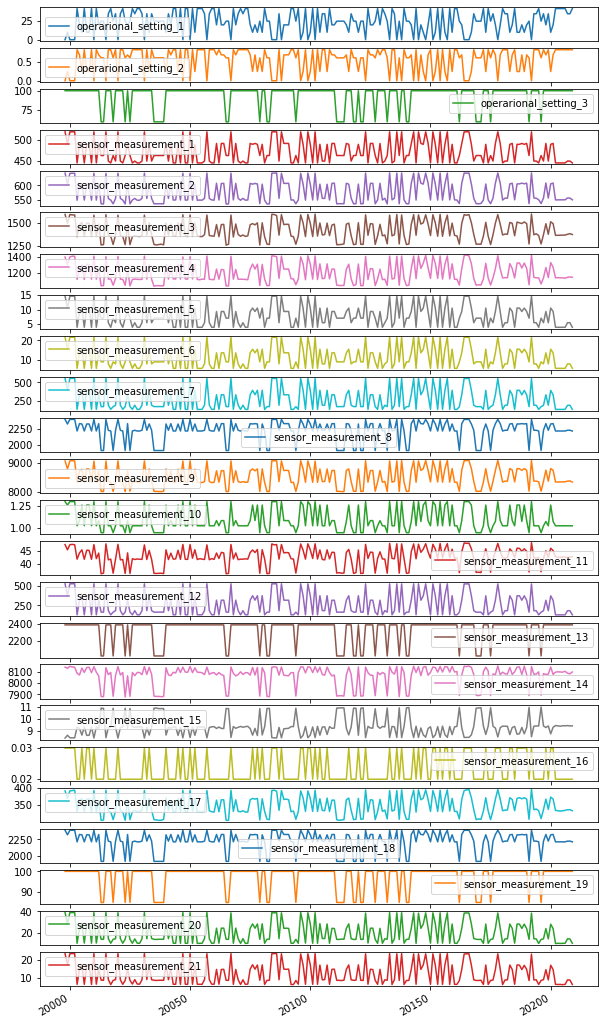

In [7]:
df_train_2[df_train_2["ID"]==100].drop(columns=["ID","Cycle"]).plot(subplots=True, figsize=(10,20));

#### Define the target variable to determine, Remaining Useful Life:

First, define the maximum number of cycles reached by each engine, merge with current dataset and then create the new variable

In [8]:
max_cycle_2 = df_train_2.groupby(["ID"])["Cycle"].max().reset_index().rename(columns={"Cycle":"Max_Cycle"})
max_cycle_2

ID  Max_Cycle
0      1        149
1      2        269
2      3        206
3      4        235
4      5        154
5      6        175
6      7        174
7      8        151
8      9        199
9     10        184
10    11        271
11    12        249
12    13        227
13    14        193
14    15        209
15    16        154
16    17        180
17    18        209
18    19        163
19    20        154
20    21        189
21    22        192
22    23        211
23    24        191
24    25        205
25    26        187
26    27        176
27    28        200
28    29        151
29    30        166
30    31        343
31    32        281
32    33        195
33    34        205
34    35        196
35    36        203
36    37        210
37    38        177
38    39        214
39    40        193
40    41        262
41    42        221
42    43        211
43    44        205
44    45        151
45    46        201
46    47        246
47    48        239
48    49        168
49    50        222
50    51        293
51    52        174
52    53        148
53    54        199
54    55        159
55    56        163
56    57        140
57    58        162
58    59        194
59    60        177
60    61        218
61    62        184
62    63        168
63    64        282
64    65        206
65    66        170
66    67        145
67    68        185
68    69        136
69    70        156
70    71        194
71    72        196
72    73        239
73    74        158
74    75        231
75    76        244
76    77        185
77    78        161
78    79        181
79    80        221
80    81        288
81    82        200
82    83        170
83    84        259
84    85        347
85    86        190
86    87        170
87    88        365
88    89        188
89    90        188
90    91        245
91    92        188
92    93        189
93    94        306
94    95        198
95    96        208
96    97        145
97    98        167
98    99        202
99   100        212
100  101        211
101  102        164
102  103        280
103  104        228
104  105        303
105  106        272
106  107        145
107  108        156
108  109        220
109  110        221
110  111        200
111  112        378
112  113        232
113  114        203
114  115        206
115  116        207
116  117        177
117  118        344
118  119        174
119  120        129
120  121        210
121  122        185
122  123        226
123  124        267
124  125        168
125  126        199
126  127        256
127  128        303
128  129        202
129  130        182
130  131        280
131  132        183
132  133        159
133  134        247
134  135        294
135  136        160
136  137        148
137  138        200
138  139        194
139  140        214
140  141        163
141  142        208
142  143        166
143  144        224
144  145        251
145  146        263
146  147        207
147  148        279
148  149        289
149  150        222
150  151        177
151  152        184
152  153        292
153  154        193
154  155        226
155  156        299
156  157        237
157  158        308
158  159        241
159  160        212
160  161        224
161  162        194
162  163        203
163  164        249
164  165        165
165  166        204
166  167        232
167  168        217
168  169        185
169  170        179
170  171        258
171  172        174
172  173        151
173  174        193
174  175        202
175  176        164
176  177        181
177  178        148
178  179        181
179  180        297
180  181        255
181  182        200
182  183        207
183  184        171
184  185        162
185  186        194
186  187        168
187  188        148
188  189        209
189  190        257
190  191        219
191  192        133
192  193        172
193  194        148
194  195        190
195  196        239
196  197        154
197  198        205
198  199        219
199  2

In [9]:
df_train_2 = df_train_2.merge(max_cycle_2, how="inner", on="ID")
df_train_2["RUL"] = df_train_2["Max_Cycle"] - df_train_2["Cycle"]
df_train_2.drop(["Max_Cycle"], axis=1, inplace=True)
df_train_2.head()

ID  Cycle  operarional_setting_1  operarional_setting_2  operarional_setting_3  sensor_measurement_1  sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  sensor_measurement_6  sensor_measurement_7  sensor_measurement_8  sensor_measurement_9  sensor_measurement_10  sensor_measurement_11  sensor_measurement_12  sensor_measurement_13  sensor_measurement_14  sensor_measurement_15  sensor_measurement_16  sensor_measurement_17  sensor_measurement_18  sensor_measurement_19  sensor_measurement_20  sensor_measurement_21  RUL
0   1      1                34.9983                 0.8400                  100.0                449.44                555.32               1358.61               1137.23                  5.48                  8.00                194.64               2222.65               8341.91                   1.02                  42.02                 183.06                2387.72                8048.56                 9.3461                   0.02                    334                   2223                 100.00                  14.73                 8.8071  148
1   1      2                41.9982                 0.8408                  100.0                445.00                549.90               1353.22               1125.78                  3.91                  5.71                138.51               2211.57               8303.96                   1.02                  42.20                 130.42                2387.66                8072.30                 9.3774                   0.02                    330                   2212                 100.00                  10.41                 6.2665  147
2   1      3                24.9988                 0.6218                   60.0                462.54                537.31               1256.76               1047.45                  7.05                  9.02                175.71               1915.11               8001.42                   0.94                  36.69                 164.22                2028.03                7864.87                10.8941                   0.02                    309                   1915                  84.93                  14.08                 8.6723  146
3   1      4                42.0077                 0.8416                  100.0                445.00                549.51               1354.03               1126.38                  3.91                  5.71                138.46               2211.58               8303.96                   1.02                  41.96                 130.72                2387.61                8068.66                 9.3528                   0.02                    329                   2212                 100.00                  10.59                 6.4701  145
4   1      5                25.0005                 0.6203                   60.0                462.54                537.07               1257.71               1047.93                  7.05                  9.03                175.05               1915.10               7993.23                   0.94                  36.89                 164.31                2028.00                7861.23                10.8963                   0.02                    309                   1915                  84.93                  14.13                 8.5286  144

Engine Life Study

In [10]:
df_train_2.shape

(53759, 27)

Top 10 engines with maximum life

In [11]:
df_train_2[["ID","Cycle"]].groupby("ID").max(["Cycle"]).sort_values(by="Cycle", ascending=False).head(10)

Cycle
ID        
112    378
88     365
85     347
118    344
31     343
255    340
260    316
257    309
158    308
94     306

Maximum cycles reached are above 300, let's check average dataset values

Average value for max cycles reached in Dataset:  206.76538461538462


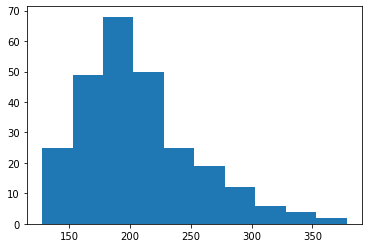

In [12]:
plt.hist(max_cycle_2["Max_Cycle"])
print("Average value for max cycles reached in Dataset: ", max_cycle_2["Max_Cycle"].mean())

Remaining useful Life

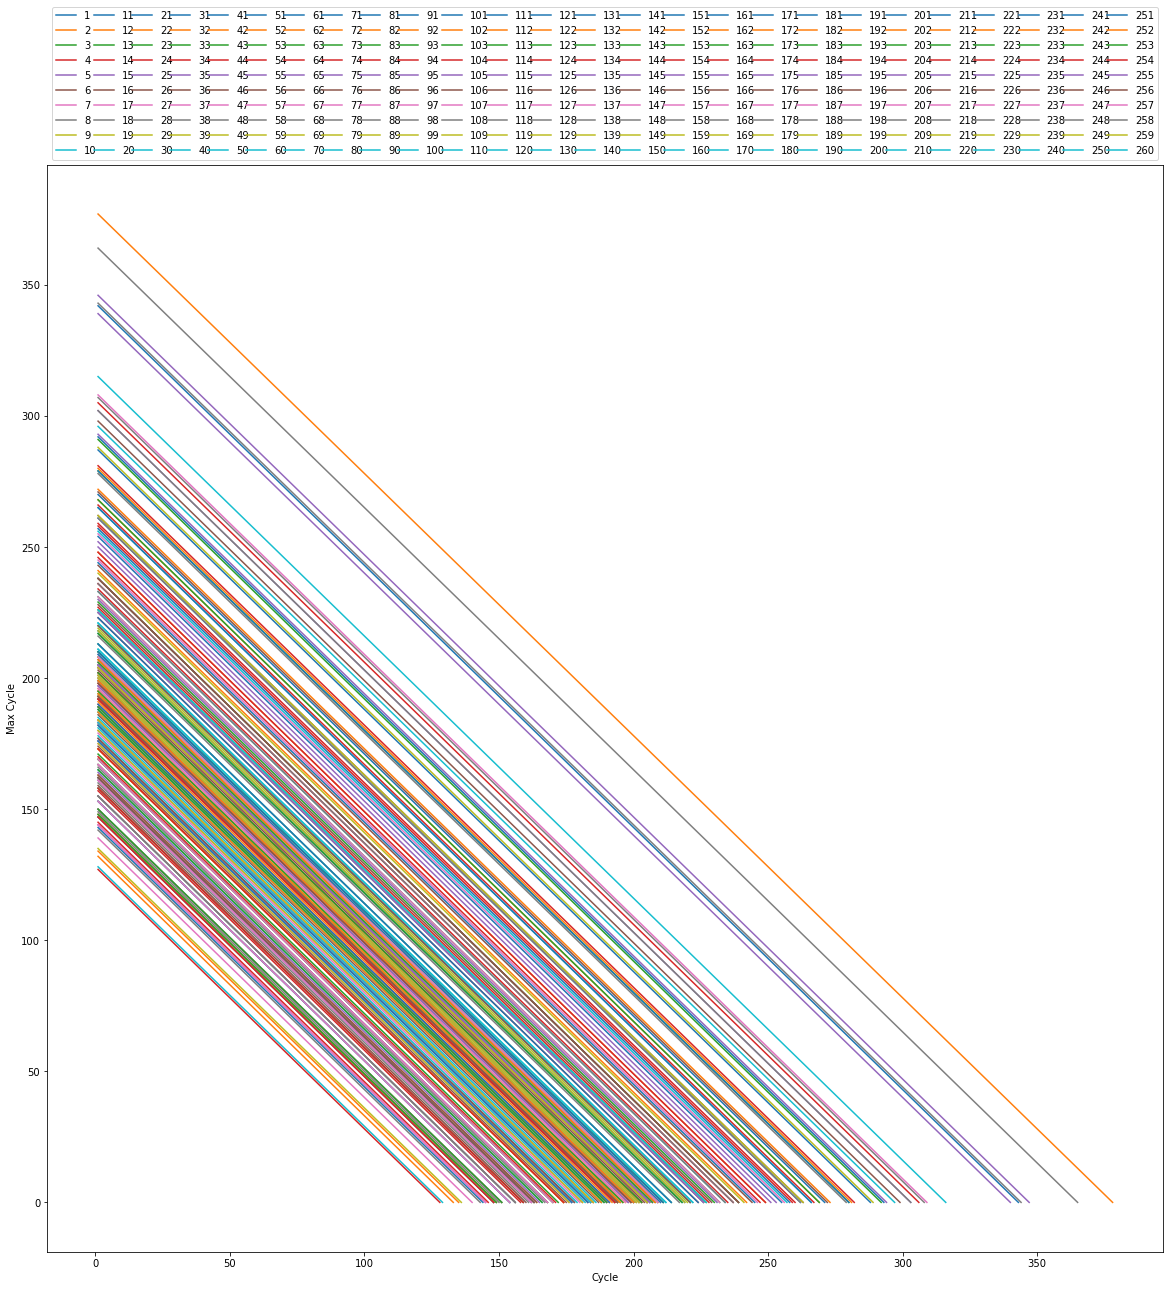

In [13]:
df_RUL_plot = df_train_2[["ID","Cycle","RUL"]].pivot(index="Cycle", columns="ID", values="RUL")
df_RUL_plot.plot(figsize=(20,20))
plt.ylabel("Max Cycle")
plt.legend(ncol=26, loc=3, bbox_to_anchor=(0,1,1,1), mode="expand");

Operational Settings

In [14]:
op_columns = ["operarional_setting_1","operarional_setting_2","operarional_setting_3"]
for col in op_columns:
    df = df_train_2[["ID","Cycle",col]]
    print(df[col].max())

42.008
0.842
100.0


Max value for operarional_setting_1: 42.008 
 Min value for operarional_setting_1: 0.0 
 Average value for operarional_setting_1: 23.998407440615043 

Max value for operarional_setting_2: 0.842 
 Min value for operarional_setting_2: 0.0 
 Average value for operarional_setting_2: 0.5720563533548174 

Max value for operarional_setting_3: 100.0 
 Min value for operarional_setting_3: 60.0 
 Average value for operarional_setting_3: 94.04602020126862 



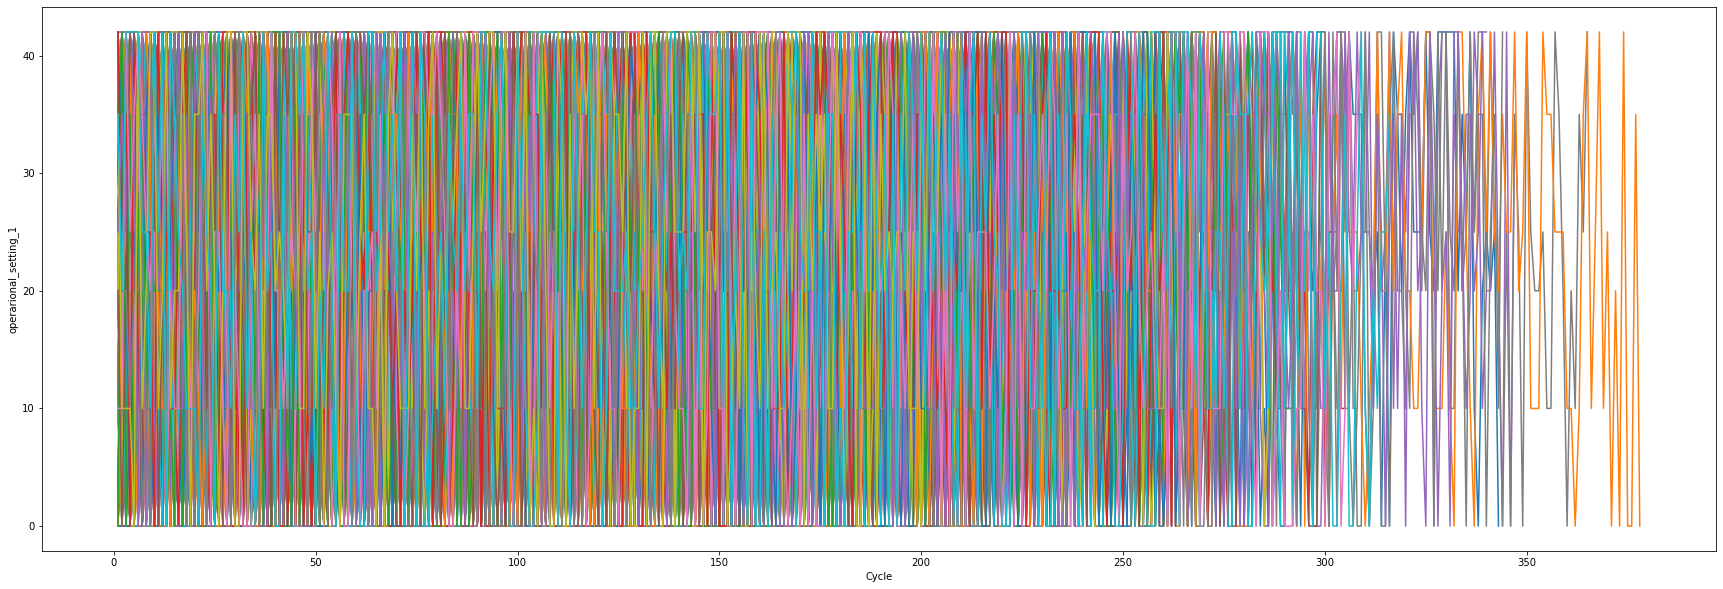

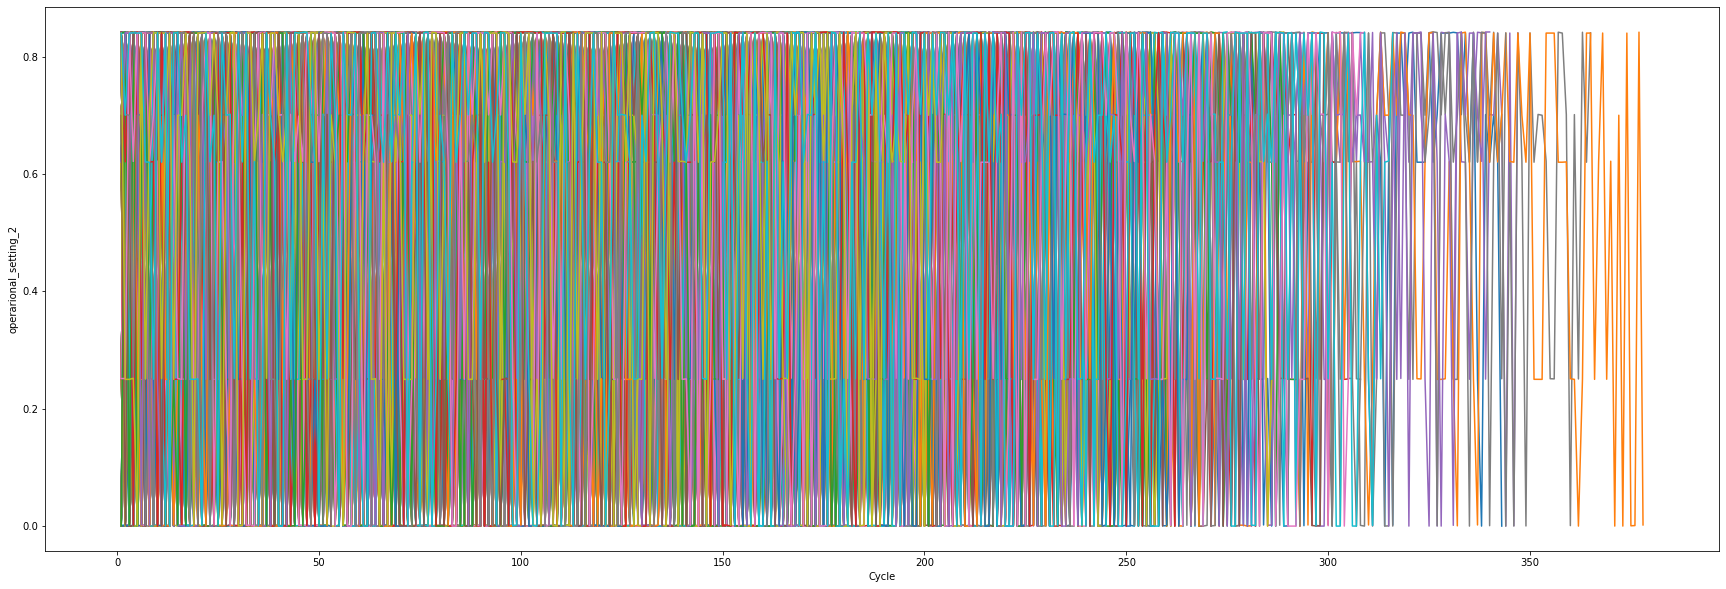

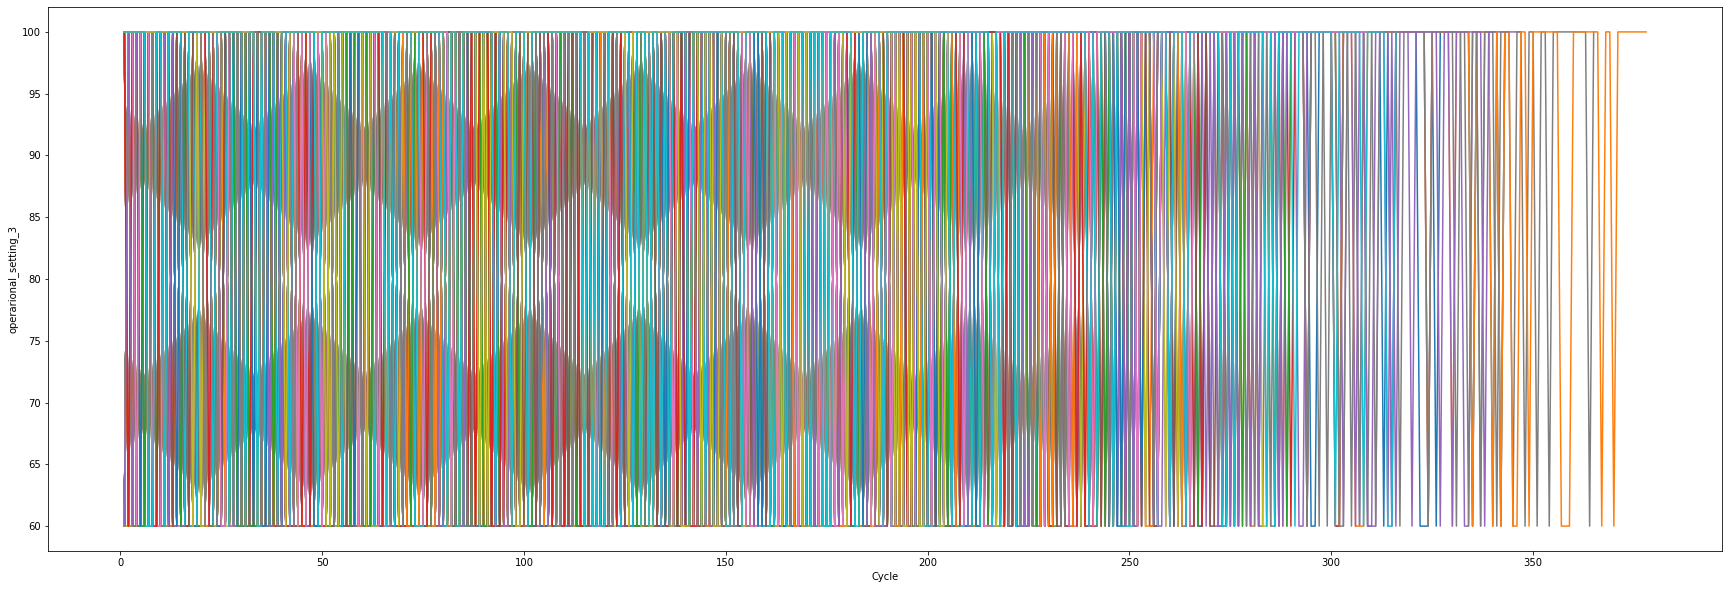

In [15]:
op_columns = ["operarional_setting_1","operarional_setting_2","operarional_setting_3"]
for col in op_columns:
    print("Max value for {}:".format(col),df_train_2[col].max(), "\n",
         "Min value for {}:".format(col),df_train_2[col].min(), "\n",
        "Average value for {}:".format(col),df_train_2[col].mean(), "\n")
    df = df_train_2[["ID","Cycle",col]].pivot(index="Cycle", columns="ID", values=col)
    df.plot(figsize=(30,10), legend=None)
    plt.ylabel(str(col))

Unlike DF001, in this dataset, each operational setting varies throughout engine performance

Let's check these operational settings separately for each engine

In [25]:
settings = df_train_2[["operarional_setting_1","operarional_setting_2","operarional_setting_3"]]
settings

operarional_setting_1  operarional_setting_2  operarional_setting_3
0                    34.9983                 0.8400                  100.0
1                    41.9982                 0.8408                  100.0
2                    24.9988                 0.6218                   60.0
3                    42.0077                 0.8416                  100.0
4                    25.0005                 0.6203                   60.0
...                      ...                    ...                    ...
53754                20.0037                 0.7000                  100.0
53755                10.0022                 0.2510                  100.0
53756                25.0041                 0.6200                   60.0
53757                25.0033                 0.6220                   60.0
53758                35.0036                 0.8400                  100.0

[53759 rows x 3 columns]

Within these operational settings, it is expected to identify the 6 different operating conditions:

In [26]:
for column in settings.columns:
    print("The different operating conditions displayed for {} are: ".format(column), settings[column].round().unique())

The different operating conditions displayed for operarional_setting_1 are:  [35. 42. 25. 20.  0. 10.]
The different operating conditions displayed for operarional_setting_2 are:  [1. 0.]
The different operating conditions displayed for operarional_setting_3 are:  [100.  60.]


In [36]:
for column in settings.columns:
    settings[column] = settings[column].round()
settings.groupby(by=["operarional_setting_1","operarional_setting_2","operarional_setting_3"]).size()

<ipython-input-36-749c19a025fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  settings[column] = settings[column].round()


operarional_setting_1  operarional_setting_2  operarional_setting_3
0.0                    0.0                    100.0                     8044
10.0                   0.0                    100.0                     8096
20.0                   1.0                    100.0                     8122
25.0                   1.0                    60.0                      8002
35.0                   1.0                    100.0                     8037
42.0                   1.0                    100.0                    13458
dtype: int64

In [18]:
df_train_2.drop(["operarional_setting_3"], axis=1,inplace=True)
df_train_2.head()

ID  Cycle  operarional_setting_1  operarional_setting_2  sensor_measurement_1  sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  sensor_measurement_6  sensor_measurement_7  sensor_measurement_8  sensor_measurement_9  sensor_measurement_10  sensor_measurement_11  sensor_measurement_12  sensor_measurement_13  sensor_measurement_14  sensor_measurement_15  sensor_measurement_16  sensor_measurement_17  sensor_measurement_18  sensor_measurement_19  sensor_measurement_20  sensor_measurement_21  RUL
0   1      1                34.9983                 0.8400                449.44                555.32               1358.61               1137.23                  5.48                  8.00                194.64               2222.65               8341.91                   1.02                  42.02                 183.06                2387.72                8048.56                 9.3461                   0.02                    334                   2223                 100.00                  14.73                 8.8071  148
1   1      2                41.9982                 0.8408                445.00                549.90               1353.22               1125.78                  3.91                  5.71                138.51               2211.57               8303.96                   1.02                  42.20                 130.42                2387.66                8072.30                 9.3774                   0.02                    330                   2212                 100.00                  10.41                 6.2665  147
2   1      3                24.9988                 0.6218                462.54                537.31               1256.76               1047.45                  7.05                  9.02                175.71               1915.11               8001.42                   0.94                  36.69                 164.22                2028.03                7864.87                10.8941                   0.02                    309                   1915                  84.93                  14.08                 8.6723  146
3   1      4                42.0077                 0.8416                445.00                549.51               1354.03               1126.38                  3.91                  5.71                138.46               2211.58               8303.96                   1.02                  41.96                 130.72                2387.61                8068.66                 9.3528                   0.02                    329                   2212                 100.00                  10.59                 6.4701  145
4   1      5                25.0005                 0.6203                462.54                537.07               1257.71               1047.93                  7.05                  9.03                175.05               1915.10               7993.23                   0.94                  36.89                 164.31                2028.00                7861.23                10.8963                   0.02                    309                   1915                  84.93                  14.13                 8.5286  144

#### Sensor Measurement Analysis

Let's focus on a specific engine and plot the different sensor performances

Write engine ID to get the sensor measurements: 4


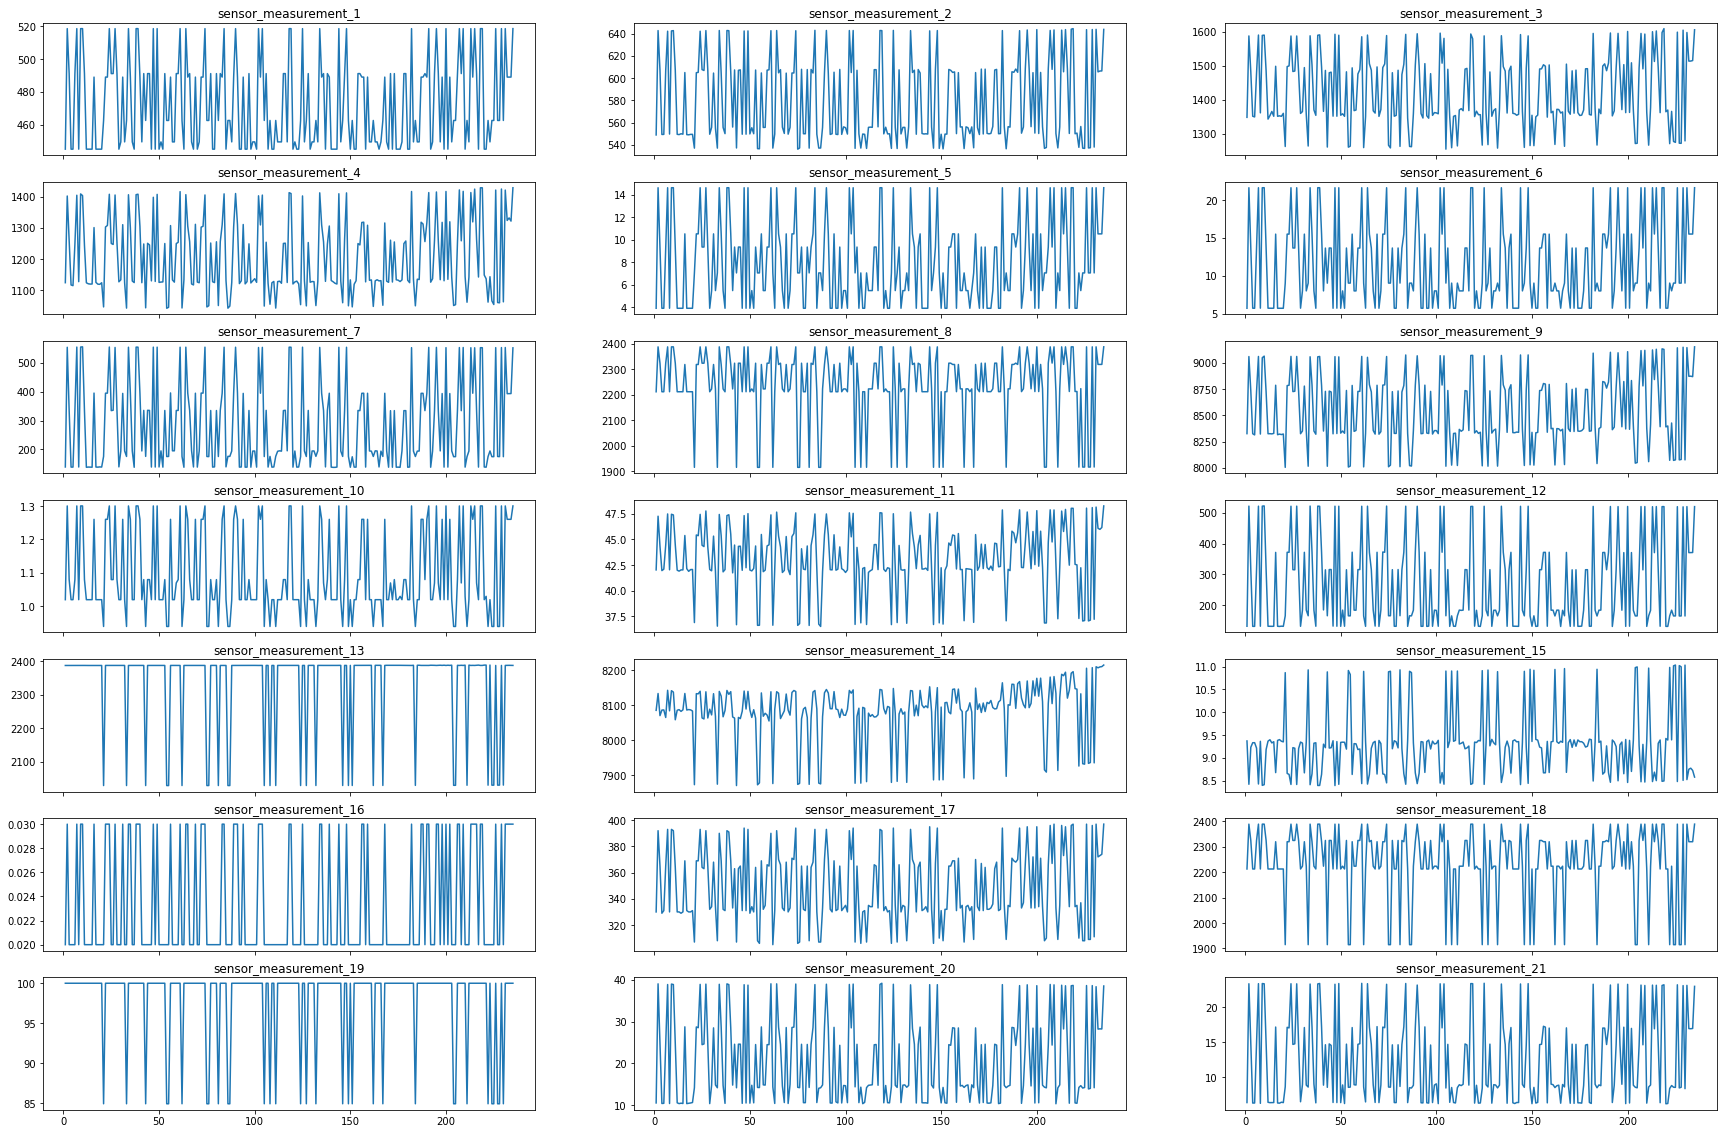

In [38]:
fig, ax = plt.subplots(7,3, figsize=(30,20), sharex=True)

unit = input("Write engine ID to get the sensor measurements: ")
df_unit = df_train_2.query("ID==@unit")

contador = 0
for i in range(0,7):
    for j in range(0,3):
        ax[i,j].plot(df_unit["Cycle"], df_unit["sensor_measurement_"+str(contador+1)])
        ax[i,j].set_title("sensor_measurement_"+str(contador+1))
        contador+=1
plt.show()

Sensor's performances are not able to extract any comprehension from them, there is not a trend during performance.

The explanation comes by the understanding of the different condition occurring between cycles

Based on the standard deviation as previous datasets analysis, in this case we do not extract any useful information

In [39]:
unit = input("Write engine ID to get the sensor measurements: ")
df_unit = df_train_2.query("ID==@unit")
sensors = df_unit.columns[4:-1]
standards = []
for column in sensors:
    standard_dev = df_unit[column].std()
    standards.append(standard_dev)
sensors_std = pd.DataFrame({"sensor":sensors, "std":standards})
sensors_std.sort_values("std")

Write engine ID to get the sensor measurements: 5


sensor         std
16  sensor_measurement_16    0.004592
10  sensor_measurement_10    0.127293
15  sensor_measurement_15    0.781170
11  sensor_measurement_11    3.303503
5    sensor_measurement_5    3.383149
6    sensor_measurement_6    5.097859
21  sensor_measurement_21    5.604065
19  sensor_measurement_19    5.748982
20  sensor_measurement_20    9.345657
0   operarional_setting_3   15.259407
1    sensor_measurement_1   24.980474
17  sensor_measurement_17   27.356463
2    sensor_measurement_2   36.043935
14  sensor_measurement_14   91.424303
3    sensor_measurement_3  104.691897
4    sensor_measurement_4  116.906007
12  sensor_measurement_12  130.240374
13  sensor_measurement_13  137.239888
7    sensor_measurement_7  138.124750
8    sensor_measurement_8  151.304381
18  sensor_measurement_18  151.506214
9    sensor_measurement_9  333.957534

Write engine ID to get the sensor measurements: 8


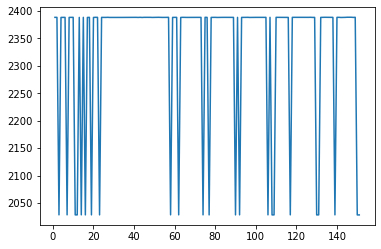

In [40]:
unit = input("Write engine ID to get the sensor measurements: ")
df_unit = df_train_2.query("ID==@unit")
plt.plot(df_unit["Cycle"], df_unit["sensor_measurement_13"])

Too many correlations to extract any insight

In [41]:
corr_matrix = df_train_2.corr()
corr_matrix.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1)

Let's prioritize at this point a baseline model and later on, apply further data featuring

### Prepare Train and Test datasets

TRAIN

In [192]:
df_train_2 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/train_FD002.txt', sep=" ", header=None)
list_units_1 = 3
operational_list = []
for n in range(1,list_units_1+1):
    operational = "operational_setting_" + str(n)
    operational_list.append(operational)
list_units_2 = 23
sensor_measurement_list = []
for n in range(1,list_units_2+1):
    sensor = "sensor_measurement_" + str(n)
    sensor_measurement_list.append(sensor)
    
df_train_2.columns = ["ID","Cycle"] + operational_list + sensor_measurement_list
df_train_2.dropna(axis=1, inplace=True)
max_cycle_2 = df_train_2.groupby(["ID"])["Cycle"].max().reset_index().rename(columns={"Cycle":"Max_Cycle"})
df_train_2 = df_train_2.merge(max_cycle_2, how="inner", on="ID")
df_train_2["RUL"] = df_train_2["Max_Cycle"] - df_train_2["Cycle"]
df_train_2.drop(["Max_Cycle"], axis=1, inplace=True)
df_train_2.head()

ID  Cycle  operational_setting_1  operational_setting_2  operational_setting_3  sensor_measurement_1  sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  sensor_measurement_6  sensor_measurement_7  sensor_measurement_8  sensor_measurement_9  sensor_measurement_10  sensor_measurement_11  sensor_measurement_12  sensor_measurement_13  sensor_measurement_14  sensor_measurement_15  sensor_measurement_16  sensor_measurement_17  sensor_measurement_18  sensor_measurement_19  sensor_measurement_20  sensor_measurement_21  RUL
0   1      1                34.9983                 0.8400                  100.0                449.44                555.32               1358.61               1137.23                  5.48                  8.00                194.64               2222.65               8341.91                   1.02                  42.02                 183.06                2387.72                8048.56                 9.3461                   0.02                    334                   2223                 100.00                  14.73                 8.8071  148
1   1      2                41.9982                 0.8408                  100.0                445.00                549.90               1353.22               1125.78                  3.91                  5.71                138.51               2211.57               8303.96                   1.02                  42.20                 130.42                2387.66                8072.30                 9.3774                   0.02                    330                   2212                 100.00                  10.41                 6.2665  147
2   1      3                24.9988                 0.6218                   60.0                462.54                537.31               1256.76               1047.45                  7.05                  9.02                175.71               1915.11               8001.42                   0.94                  36.69                 164.22                2028.03                7864.87                10.8941                   0.02                    309                   1915                  84.93                  14.08                 8.6723  146
3   1      4                42.0077                 0.8416                  100.0                445.00                549.51               1354.03               1126.38                  3.91                  5.71                138.46               2211.58               8303.96                   1.02                  41.96                 130.72                2387.61                8068.66                 9.3528                   0.02                    329                   2212                 100.00                  10.59                 6.4701  145
4   1      5                25.0005                 0.6203                   60.0                462.54                537.07               1257.71               1047.93                  7.05                  9.03                175.05               1915.10               7993.23                   0.94                  36.89                 164.31                2028.00                7861.23                10.8963                   0.02                    309                   1915                  84.93                  14.13                 8.5286  144

TEST

In [193]:
df_test_2 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/test_FD002.txt', sep=" ", header=None)

df_test_2.columns = ["ID","Cycle"] + operational_list + sensor_measurement_list
df_test_2.dropna(axis=1, inplace=True)

df_test_2.head()

ID  Cycle  operational_setting_1  operational_setting_2  operational_setting_3  sensor_measurement_1  sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  sensor_measurement_6  sensor_measurement_7  sensor_measurement_8  sensor_measurement_9  sensor_measurement_10  sensor_measurement_11  sensor_measurement_12  sensor_measurement_13  sensor_measurement_14  sensor_measurement_15  sensor_measurement_16  sensor_measurement_17  sensor_measurement_18  sensor_measurement_19  sensor_measurement_20  sensor_measurement_21
0   1      1                 9.9987                 0.2502                  100.0                489.05                605.03               1497.17               1304.99                 10.52                 15.49                394.54               2318.96               8763.80                   1.26                  45.61                 371.69                2388.18                8114.10                 8.6476                   0.03                    369                   2319                 100.00                  28.42                17.1551
1   1      2                20.0026                 0.7000                  100.0                491.19                607.82               1481.20               1246.11                  9.35                 13.66                334.36               2323.95               8713.21                   1.08                  44.26                 315.32                2388.12                8053.06                 9.2405                   0.02                    364                   2324                 100.00                  24.29                14.8039
2   1      3                35.0045                 0.8400                  100.0                449.44                556.00               1359.08               1128.36                  5.48                  8.00                193.55               2222.67               8340.20                   1.02                  41.80                 183.04                2387.75                8053.04                 9.3472                   0.02                    333                   2223                 100.00                  14.98                 8.9125
3   1      4                42.0066                 0.8410                  100.0                445.00                550.17               1349.69               1127.89                  3.91                  5.71                138.74               2211.58               8313.85                   1.02                  42.21                 130.40                2387.72                8066.90                 9.3961                   0.02                    332                   2212                 100.00                  10.35                 6.4181
4   1      5                24.9985                 0.6213                   60.0                462.54                536.72               1253.18               1050.69                  7.05                  9.03                175.75               1915.10               7997.13                   0.94                  36.76                 164.56                2028.05                7865.66                10.8682                   0.02                    305                   1915                  84.93                  14.31                 8.5740

RUL

In [194]:
df_RUL_2 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/RUL_FD002.txt', sep=" ", header=None)
df_RUL_2.dropna(axis=1, inplace=True)
df_RUL_2.columns = ["RUL"]
df_RUL_2

RUL
0     18
1     79
2    106
3    110
4     15
5    155
6      6
7     90
8     11
9     79
10     6
11    73
12    30
13    11
14    37
15    67
16    68
17    99
18    22
19    54
20    97
21    10
22   142
23    77
24    88
25   163
26   126
27   138
28    83
29    78
30    75
31    11
32    53
33   173
34    63
35   100
36   151
37    55
38    48
39    37
40    44
41    27
42    18
43     6
44    15
45   112
46   131
47    13
48   122
49    13
50    98
51    53
52    52
53   106
54   103
55   152
56   123
57    26
58   178
59    73
60   169
61    39
62    39
63    14
64    11
65   121
66    86
67    56
68   115
69    17
70   148
71   104
72    78
73    86
74    98
75    36
76    94
77    52
78    91
79    15
80   141
81    74
82   146
83    17
84    47
85   194
86    21
87    79
88    97
89     8
90     9
91    73
92   183
93    97
94    73
95    49
96    31
97    97
98     9
99    14
100  106
101    8
102    8
103  106
104  116
105  120
106   61
107  168
108   35
109   80
110    9
111   50
112  151
113   78
114   91
115    7
116  181
117  150
118  106
119   15
120   67
121  145
122  180
123    7
124  179
125  124
126   82
127  108
128   79
129  121
130  120
131   39
132   38
133    9
134  167
135   87
136   88
137    7
138   51
139   55
140  155
141   47
142   81
143   43
144   98
145   10
146   92
147   11
148  165
149   34
150  115
151   59
152   99
153  103
154  108
155   83
156  171
157   15
158    9
159   42
160   13
161   41
162   88
163   14
164  155
165  188
166   96
167   82
168  135
169  182
170   36
171  107
172   14
173   95
174  142
175   23
176    6
177  144
178   35
179   97
180   68
181   14
182   67
183  191
184   19
185   10
186  158
187  183
188   43
189   12
190  148
191   13
192   37
193  122
194   80
195   93
196  132
197   32
198  103
199  174
200  111
201   68
202  192
203  121
204  134
205   48
206   85
207    8
208   23
209    8
210    6
211   57
212   83
213  172
214  101
215   81
216   86
217  165
218   73
219  121
220  139
221   75
222  151
223  145
224   11
225  108
226   14
227  126
228   61
229   85
230    8
231  101
232  153
233   89
234  190
235   12
236   62
237  134
238  101
239  121
240  167
241   17
242  161
243  181
244   16
245  152
246  148
247   56
248  111
249   23
250   84
251   12
252   43
253   48
254  122
255  191
256   56
257  131
258   51

## Linear Regression modelling

As identified in previous datasets analysis, it is understood that upper clipping y_train provides better results for both training and test split, so it will be hence used in this baseline model as well, and set scores which will be the aim to beat

In [195]:
labels_to_drop = ["ID","Cycle"]
X_train_2 = df_train_2.drop(labels_to_drop+["RUL"], axis=1)

X_test_2 = df_test_2.groupby("ID").last().reset_index().drop(labels_to_drop, axis=1)
y_test_2 = df_RUL_2
print("X_train columns: ", X_train_2.columns, "\n",
     "X_test columns: ", X_test_2.columns, "\n",
     y_train_2.shape)

X_train columns:  Index(['operational_setting_1', 'operational_setting_2', 'operational_setting_3', 'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_10', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_16', 'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20', 'sensor_measurement_21'], dtype='object') 
 X_test columns:  Index(['operational_setting_1', 'operational_setting_2', 'operational_setting_3', 'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_10', 'sensor_measurement_11', 

# Linear Regression

In [196]:
clips = np.arange(100,170,5).tolist()
train_scores = []
test_scores = []

for clip in clips:
    y_train_clip = df_train_2["RUL"].clip(upper=clip)

    lr = LinearRegression()
    lr.fit(X_train_2, y_train_clip)
    
    preds_train = lr.predict(X_train_2)
    r2_tr = r2_score(y_train_clip, preds_train)
    train_scores.append(r2_tr)
    
    preds_test = lr.predict(X_test_2)
    r2_ts = r2_score(y_test_2, preds_test)
    test_scores.append(r2_ts)
    
    print("TRAIN METRICS for {} upper clip".format(clip),"               ","TEST METRICS for {} upper clip".format(clip), "\n",
                  "MAE: ", median_absolute_error(y_train_clip, preds_train),"                       ","MAE: ", median_absolute_error(y_test_2, preds_test), "\n",
                  "MSE: ", mean_squared_error(y_train_clip, preds_train),"                       ","MSE: ", mean_squared_error(y_test_2, preds_test), "\n",
                  "RMSE: ",np.sqrt(mean_squared_error(y_train_clip, preds_train)),"                      ","RMSE: ",np.sqrt(mean_squared_error(y_test_2, preds_test)), "\n",
                  "R2 score: ", r2_score(y_train_clip, preds_train),"                 ","R2 score: ", r2_score(y_test_2, preds_test), "\n", "\n")

TRAIN METRICS for 100 upper clip                 TEST METRICS for 100 upper clip 
 MAE:  11.450963846884406                         MAE:  19.262491209698055 
 MSE:  269.0270246753217                         MSE:  1427.890685120718 
 RMSE:  16.402043307933365                        RMSE:  37.78744083846799 
 R2 score:  0.7412885534317668                   R2 score:  0.5062889587230021 
 

TRAIN METRICS for 105 upper clip                 TEST METRICS for 105 upper clip 
 MAE:  12.173862495445064                         MAE:  18.721123492885454 
 MSE:  304.61972249154616                         MSE:  1325.0216506039735 
 RMSE:  17.453358487452956                        RMSE:  36.40084683910491 
 R2 score:  0.7393287317632325                   R2 score:  0.5418572124245293 
 

TRAIN METRICS for 110 upper clip                 TEST METRICS for 110 upper clip 
 MAE:  12.90578421930877                         MAE:  19.696034915497876 
 MSE:  343.6163372245115                         MSE:  1238

Train Score from max Test Score:  0.6842001682342818 
 Max Test Score:  0.6635389351332279 
 Achieved with 165 upper clipped RUL


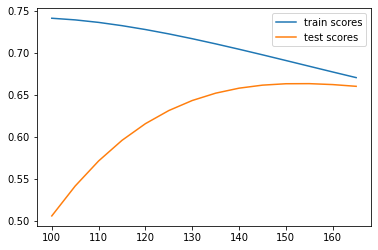

In [197]:
plt.plot(clips,train_scores,label="train scores")
plt.plot(clips, test_scores, label="test scores")
plt.legend()
mx_test = max(test_scores)
mx_idx = test_scores.index(mx_test)
train_mx_test = train_scores[mx_idx]
print("Train Score from max Test Score: ", train_mx_test, "\n",
      "Max Test Score: ", mx_test, "\n",
     "Achieved with {} upper clipped RUL".format(clip))

# Neural Network

In [257]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

Define Validation Set from Training dataset

Let's check the maximum cycles distribution are similar between train and validation set

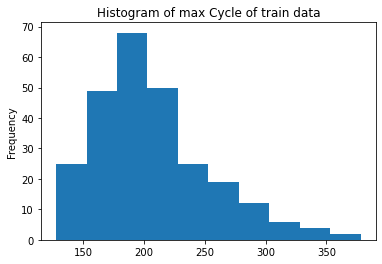

In [220]:
plt.figure()
df_train_2.groupby("ID")["Cycle"].max().plot(kind='hist')
plt.title("Histogram of max Cycle of train data")
plt.show()
plt.close()

Let's find the validation dataset with the IDs relying on the most similar histogram (regarding max cycle life) between both datasets

In [247]:
p_values = []
y = df_2.groupby("ID")["Cycle"].max()
randoms = np.arange(0,1000)
for n in randoms:
    np.random.seed(n)
    random_engines = np.random.randint(1,260,20).tolist()
    df = df_2.copy()
    val_2 = df[df.ID.isin(random_engines)]    
    x = val_2.groupby("ID")["Cycle"].max()
    #print("seed: ",n, "p-value: ", ks_2samp(x,y)[1])
    p_values.append(ks_2samp(x,y)[1])

In [250]:
p_val = 0.95
absolute_difference_function = lambda p_values : abs(p_values - p_val)
closest_val = min(p_values, key=absolute_difference_function)
closest_idx = p_values.index(closest_val)
seed_mx = randoms[closest_idx]
print("Seed with closest similarity between train and validation set is: ", seed_mx, " with a p-value of: ", closest_val)

Seed with closest similarity between train and validation set is:  487  with a p-value of:  0.9505207549268861


In [252]:
np.random.seed(seed_mx)
df_2 = df_train_2.copy()
random_engines = np.random.randint(1,260,20).tolist()
val_df_2 = df_2[df_2.ID.isin(random_engines)]
df_2 = df_2[~df_2.ID.isin(random_engines)]

In [253]:
random_engines.sort()
print(random_engines)

[7, 13, 39, 45, 49, 52, 59, 62, 63, 64, 113, 114, 129, 137, 162, 210, 231, 250, 251, 255]


In [254]:
val_df_2["ID"].unique()

array([  7,  13,  39,  45,  49,  52,  59,  62,  63,  64, 113, 114, 129,
       137, 162, 210, 231, 250, 251, 255])

In [255]:
df_2["ID"].unique()

array([  1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  40,  41,  42,
        43,  44,  46,  47,  48,  50,  51,  53,  54,  55,  56,  57,  58,
        60,  61,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130,
       131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 19

Neural networks tend to use relative distances between data points, thereforte, adding scaling is necessary

In [275]:
labels_to_drop = ["ID","Cycle","operational_setting_1","operational_setting_2","operational_setting_3"]
X_train = df_2.drop(labels_to_drop+["RUL"], axis=1)
y_train = df_2["RUL"].clip(upper=165)
X_test = df_test_2.groupby("ID").last().reset_index().drop(labels_to_drop, axis=1)
y_test_2 = df_RUL_2

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [276]:
X_train_val = val_df_2.drop(labels_to_drop+["RUL"], axis=1)
y_train_val = val_df_2["RUL"].clip(upper=165)

X_train_scal_val = scaler.transform(X_train_val)


In [277]:
input_dim = len(X_train.columns)

model = Sequential()
model.add(Dense(16,input_dim=input_dim, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [278]:
epochs = 30

history = model.fit(X_train_scal, y_train,
                    validation_data=(X_train_scal_val, y_train_val),
                    epochs=epochs)

Epoch 1/30
1554/1554 [==============================] - 4s 2ms/step - loss: 3555.2407 - val_loss: 2822.9241
Epoch 2/30
1554/1554 [==============================] - 3s 2ms/step - loss: 2767.3625 - val_loss: 2585.1685
Epoch 3/30
1554/1554 [==============================] - 3s 2ms/step - loss: 2268.5669 - val_loss: 1785.1635
Epoch 4/30
1554/1554 [==============================] - 3s 2ms/step - loss: 1325.2007 - val_loss: 1077.9474
Epoch 5/30
1554/1554 [==============================] - 3s 2ms/step - loss: 1056.2522 - val_loss: 998.6581
Epoch 6/30
1554/1554 [==============================] - 3s 2ms/step - loss: 1021.3892 - val_loss: 980.4788
Epoch 7/30
1554/1554 [==============================] - 3s 2ms/step - loss: 1003.1172 - val_loss: 987.7994
Epoch 8/30
1554/1554 [==============================] - 3s 2ms/step - loss: 986.7783 - val_loss: 933.9668
Epoch 9/30
1554/1554 [==============================] - 3s 2ms/step - loss: 981.6918 - val_loss: 1187.6125
Epoch 10/30
1554/1554 [===========

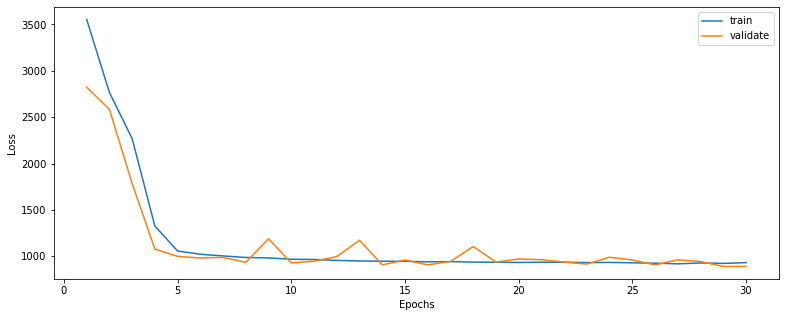

In [279]:
def plot_loss(fit_history):
    plt.figure(figsize=(13,5))
    plt.plot(range(1, len(fit_history.history['loss'])+1), fit_history.history['loss'], label='train')
    plt.plot(range(1, len(fit_history.history['val_loss'])+1), fit_history.history['val_loss'], label='validate')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

In [280]:
preds_model = model.predict(X_train_scal)
print("TRAIN METRICS for Model", "\n",
                  "MAE: ", median_absolute_error(y_train, preds_model),
                  "MSE: ", mean_squared_error(y_train, preds_model),
                  "RMSE: ",np.sqrt(mean_squared_error(y_train, preds_model)),
                  "R2 score: ", r2_score(y_train, preds_model))

TRAIN METRICS for Model 
 MAE:  20.591476440429688 MSE:  915.9227471744699 RMSE:  30.264215621331903 R2 score:  0.6883002629356317


In [281]:
preds_model_test = model.predict(X_test_scal)
print("TEST METRICS for Model", "\n",
                  "MAE: ", median_absolute_error(y_test_2, preds_model_test),
                  "MSE: ", mean_squared_error(y_test_2, preds_model_test),
                  "RMSE: ",np.sqrt(mean_squared_error(y_test_2, preds_model_test)),
                  "R2 score: ", r2_score(y_test_2, preds_model_test))

TEST METRICS for Model 
 MAE:  16.142356872558594 MSE:  883.9313720766687 RMSE:  29.730983368813565 R2 score:  0.6943696862281286
